# Regularization

## L1 and L2 regularization

Regularization is a technique that is used to avoid overfitting of the data, by adding complexity to the weights.

In other words, instead of simply aiming to minimize loss (empirical risk minimization):

`minimize(loss_function)`

we'll now minimize loss+complexity, which is called structural risk minimization:

`minimize(loss_function) + complexity(model)`

Our training optimization algorithm is now a function of two terms: the loss term, which measures how well the model fits the data, and the regularization term, which measures model complexity.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints', 'car_prediction.csv', 'Regularization.ipynb']

In [4]:
# ANSI Escape Codes for BOLD and Resetting formatting - to be used in print() method ..

B = "\033[1m"
R = "\033[0m"

In [10]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.facecolor'] = '#FFF'

In [11]:
data = pd.read_csv("car_prediction.csv")

In [12]:
data.head(3)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  

[3 rows x 26 columns]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

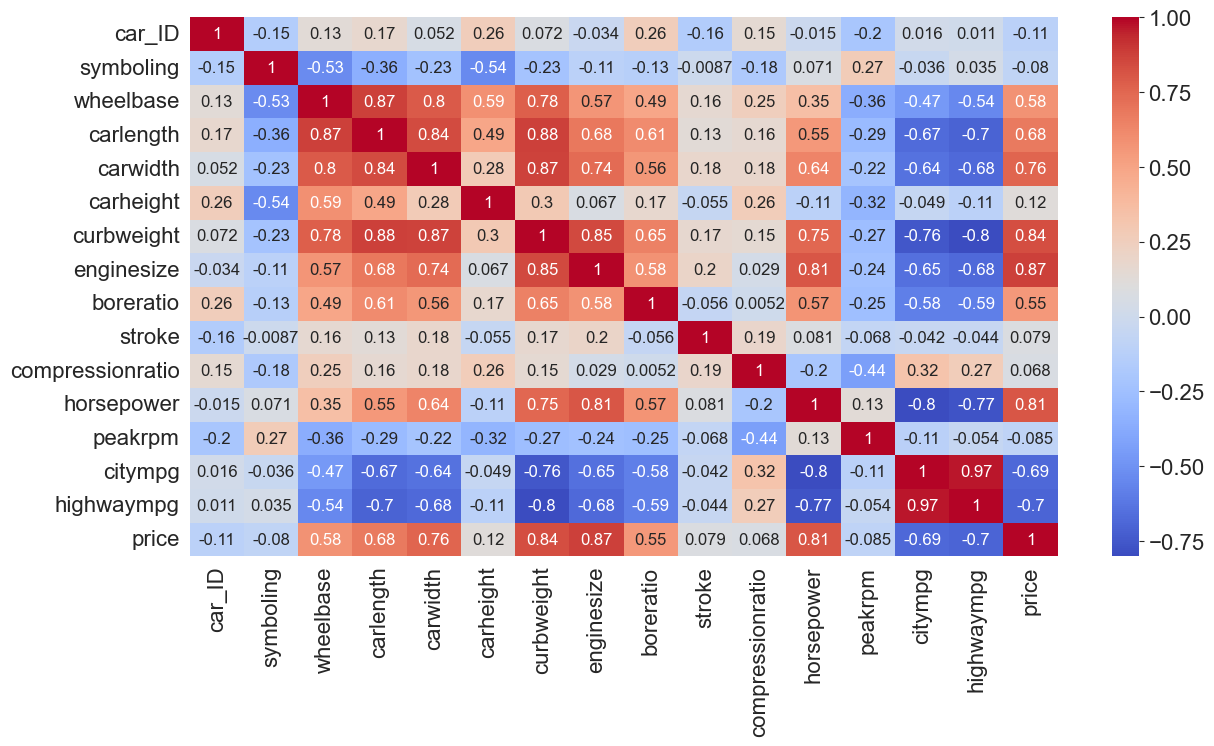

In [21]:
sns.heatmap(
    data.select_dtypes(include = ['number', 'float']).corr(),
    annot = True,
    annot_kws={"size": 12},
    cmap = 'coolwarm'
)

### Corr with respect to `price`

In [22]:
correlations = data.corr(numeric_only=True)['price'].abs().sort_values(ascending=False)
print(correlations)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64


In [55]:
numerical, category = list(), list()

In [14]:
minmax = MinMaxScaler()
le = LabelEncoder()

In [23]:
print(data.columns.tolist())

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### Feature Selection

In [24]:
features = [
    'CarName',
    'horsepower',
    'enginesize',
    'peakrpm',
    'highwaympg',
    'doornumber',
    'carlength'
]

In [25]:
X = data[features]
Y = data['price']

In [ ]:
## Not reqd .
category.append(X.dtypes[X.dtypes == 'object'].index.tolist())
numerical.append(X.dtypes[X.dtypes == np.number].index.tolist())

print(category)
print(numerical)

In [56]:
for col in X:
    if X[col].dtype == 'object':
        category.append(col)
    else:
        numerical.append(col)
print(category)
print(numerical)

['CarName', 'doornumber']
['horsepower', 'enginesize', 'peakrpm', 'highwaympg', 'carlength']


In [58]:
X[numerical] = minmax.fit_transform(X[numerical])

for cat_col in category:
    X[cat_col] = le.fit_transform(X[cat_col])

In [59]:
X

CarName  horsepower  enginesize   peakrpm  highwaympg  doornumber  \
0          2    0.262500    0.260377  0.346939    0.289474           1   
1          3    0.262500    0.260377  0.346939    0.289474           1   
2          1    0.441667    0.343396  0.346939    0.263158           1   
3          4    0.225000    0.181132  0.551020    0.368421           0   
4          5    0.279167    0.283019  0.551020    0.157895           0   
..       ...         ...         ...       ...         ...         ...   
200      139    0.275000    0.301887  0.510204    0.315789           0   
201      138    0.466667    0.301887  0.469388    0.236842           0   
202      140    0.358333    0.422642  0.551020    0.184211           0   
203      142    0.241667    0.316981  0.265306    0.289474           0   
204      143    0.275000    0.301887  0.510204    0.236842           0   

     carlength  
0     0.413433  
1     0.413433  
2     0.449254  
3     0.529851  
4     0.529851  
..         ...  
200   0.711940  
201   0.711940  
202   0.711940  
203   0.711940  
204   0.711940  

[205 rows x 7 columns]

In [60]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [61]:
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.23)

In [63]:
print(f"Splitting info (Data Count) -\n")

print(f"X(train) : {B}{X_train.shape[0]}{R}")
print(f"Y(train) : {B}{y_train.shape[0]}{R}")
print(f"x(test)  : {B}{x_test.shape[0]}{R}")
print(f"y(test)  : {B}{y_test.shape[0]}{R}")


print(f"\nCount of feature columns (predictors / independent variables)  : {B}{X_train.shape[1]}{R}")
#print(f"Count of target column (label / dependent variable)            : {B}{data.shape[1] - X_train.shape[1]}{R}")

Splitting info (Data Count) -

X(train) : 157
Y(train) : 157
x(test)  : 48
y(test)  : 48

Count of feature columns (predictors / independent variables)  : 7


In [66]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(x_test)

print("Model expects:", model.n_features_in_, "features")
print("Scaler was fitted on:", minmax.n_features_in_, "features")

Model expects: 7 features
Scaler was fitted on: 5 features


In [68]:
model.score(X_train, y_train) * 100

82.91164482152789

In [69]:
model.score(x_test, y_test) * 100

79.10407607305831

In [70]:
mean_absolute_error(y_test, predict)

2808.4944131247453

In [74]:
mean_squared_error(y_test, predict)

14619131.803435372

In [77]:
#RMSE
np.sqrt(mean_squared_error(y_test, predict))

3823.497326196969

In [75]:
model.coef_

array([-1.72848756e+01,  1.19082459e+04,  3.22695541e+04,  3.18673984e+03,
        2.65988149e+03, -3.60098607e+02,  6.20322632e+03])

In [76]:
model.intercept_

-1489.0276094246838

## Ridge Regularization (L2)
penalizes the size (square of the magnitude) of the regression coefficients

In [79]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [80]:
ridge_model.score(X_train, y_train)

0.8291065361239104

In [81]:
ridge_model.score(x_test, y_test)

0.7924581005239177

## Lasso Regularization (L1)
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “Absolute value of magnitude” of coefficient, as penalty term to the loss function.

In [82]:
lasso_model = Lasso(alpha = 0.02, tol = 0.01)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.02, tol=0.01)

In [83]:
lasso_model.score(X_train, y_train)

0.8291164446143005

In [84]:
lasso_model.score(x_test, y_test)

0.7910455132333328